In [1]:
#pip install keras_applications==1.0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install --upgrade tensorflow

In [3]:
import keras.utils as image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img#,ImageDataGenerator,image
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.models import Sequential,Model,load_model
from keras import optimizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [4]:
height=300
width=300
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(height,width,3))

In [5]:
#define directory containing training and validation data
train_dir="/content/drive/MyDrive/Dataset/Training"
validation_dir="/content/drive/MyDrive/Dataset/Validation"

#number of batches the data has to be divided into
batch_size=8

#create datagen and generator to load the data from training directory
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(height,width),batch_size=batch_size)


#create datagen and generator to load the data from validation directory
validation_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=90,horizontal_flip=True,vertical_flip=True)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(height,width),batch_size=batch_size)

Found 35 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [6]:
#our own model which will be added onto the ResNet50 model
def build_finetune_model(base_model,dropout,fc_layers,num_classes):
    for layer in base_model.layers:
        layer.trainable=False

    x=base_model.output
    x=Flatten()(x)
    for fc in fc_layers:
        x=Dense(fc,activation='relu')(x)
        x=Dropout(dropout)(x)
    
    predictions=Dense(num_classes,activation='softmax')(x)

    finetune_model=Model(inputs=base_model.input,outputs=predictions) 
    
    return finetune_model

class_list=['Real','Fake'] #the labels of our data
FC_Layers=[1024,1024]
dropout=0.5

finetune_model=build_finetune_model(base_model,dropout=dropout,fc_layers=FC_Layers,num_classes=len(class_list))

In [7]:
#define number of epochs(the number of times the model will be trained) and number of training images
num_epochs=100
num_train_images=35


In [8]:
#checkpoint in case anything goes wrong
checkpoint=ModelCheckpoint("Final_model.h5",monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)
early=EarlyStopping(monitor='val_acc',min_delta=0,patience=40,verbose=1,mode="auto")

#compile the model before using
finetune_model.compile(loss="categorical_crossentropy",optimizer=optimizers.SGD(lr=0.000001,momentum=0.9),metrics=['accuracy'])

#train the model
finetune_model.fit_generator(generator=train_generator,steps_per_epoch=num_train_images//batch_size,epochs=num_epochs,validation_data=validation_generator,validation_steps=1,callbacks=[checkpoint,early])

#save the model
finetune_model.save_weights("Final_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-8-c4ac6982538f>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  finetune_model.fit_generator(generator=train_generator,steps_per_epoch=num_train_images//batch_size,epochs=num_epochs,validation_data=validation_generator,validation_steps=1,callbacks=[checkpoint,early])


Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 1.8301 - accuracy: 0.5556

4/4 [==============================] - 43s 6s/step - loss: 1.8301 - accuracy: 0.5556 - val_loss: 0.7123 - val_accuracy: 0.7143
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 1.8882 - accuracy: 0.5185

4/4 [==============================] - 16s 4s/step - loss: 1.8882 - accuracy: 0.5185 - val_loss: 0.3228 - val_accuracy: 0.7143
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 1.7783 - accuracy: 0.4444

4/4 [==============================] - 16s 4s/step - loss: 1.7783 - accuracy: 0.4444 - val_loss: 0.8143 - val_accuracy: 0.5714
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 2.0158 - accuracy: 0.4074

4/4 [==============================] - 19s 4s/step - loss: 2.0158 - accuracy: 0.4074 - val_loss: 0.5588 - val_accuracy: 0.7143
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 1.9669 - accuracy: 0.3333

4/4 [==============================] - 18s 5s/step - loss: 1.9669 - accuracy: 0.3333 - val_loss: 0.9309 - val_accuracy: 0.5714
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 1.7437 - accuracy: 0.4375

4/4 [==============================] - 18s 5s/step - loss: 1.7437 - accuracy: 0.4375 - val_loss: 0.6228 - val_accuracy: 0.7143
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: 1.6894 - accuracy: 0.4074

4/4 [==============================] - 23s 5s/step - loss: 1.6894 - accuracy: 0.4074 - val_loss: 0.3909 - val_accuracy: 0.8571
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 1.2466 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 1.2466 - accuracy: 0.6296 - val_loss: 0.7121 - val_accuracy: 0.4286
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: 2.2125 - accuracy: 0.4444

4/4 [==============================] - 18s 5s/step - loss: 2.2125 - accuracy: 0.4444 - val_loss: 0.2095 - val_accuracy: 1.0000
Epoch 10/100
4/4 [==============================] - ETA: 0s - loss: 1.9047 - accuracy: 0.6296

4/4 [==============================] - 18s 5s/step - loss: 1.9047 - accuracy: 0.6296 - val_loss: 0.5518 - val_accuracy: 0.7143
Epoch 11/100
4/4 [==============================] - ETA: 0s - loss: 1.3677 - accuracy: 0.6250

4/4 [==============================] - 20s 6s/step - loss: 1.3677 - accuracy: 0.6250 - val_loss: 0.3235 - val_accuracy: 0.8571
Epoch 12/100
4/4 [==============================] - ETA: 0s - loss: 1.2309 - accuracy: 0.5312

4/4 [==============================] - 20s 5s/step - loss: 1.2309 - accuracy: 0.5312 - val_loss: 0.3574 - val_accuracy: 0.8571
Epoch 13/100
4/4 [==============================] - ETA: 0s - loss: 0.9226 - accuracy: 0.6667

4/4 [==============================] - 18s 5s/step - loss: 0.9226 - accuracy: 0.6667 - val_loss: 0.4516 - val_accuracy: 0.8571
Epoch 14/100
4/4 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.5926

4/4 [==============================] - 16s 4s/step - loss: 1.3853 - accuracy: 0.5926 - val_loss: 0.5520 - val_accuracy: 0.8571
Epoch 15/100
4/4 [==============================] - ETA: 0s - loss: 1.5136 - accuracy: 0.4815

4/4 [==============================] - 16s 4s/step - loss: 1.5136 - accuracy: 0.4815 - val_loss: 0.5476 - val_accuracy: 0.7143
Epoch 16/100
4/4 [==============================] - ETA: 0s - loss: 0.9025 - accuracy: 0.7407

4/4 [==============================] - 16s 4s/step - loss: 0.9025 - accuracy: 0.7407 - val_loss: 0.3231 - val_accuracy: 1.0000
Epoch 17/100
4/4 [==============================] - ETA: 0s - loss: 0.9391 - accuracy: 0.6667

4/4 [==============================] - 18s 5s/step - loss: 0.9391 - accuracy: 0.6667 - val_loss: 0.7129 - val_accuracy: 0.7143
Epoch 18/100
4/4 [==============================] - ETA: 0s - loss: 1.5491 - accuracy: 0.5185

4/4 [==============================] - 21s 6s/step - loss: 1.5491 - accuracy: 0.5185 - val_loss: 0.3588 - val_accuracy: 0.8571
Epoch 19/100
4/4 [==============================] - ETA: 0s - loss: 2.0086 - accuracy: 0.4444

4/4 [==============================] - 22s 5s/step - loss: 2.0086 - accuracy: 0.4444 - val_loss: 0.5878 - val_accuracy: 0.8571
Epoch 20/100
4/4 [==============================] - ETA: 0s - loss: 2.1323 - accuracy: 0.4815

4/4 [==============================] - 16s 5s/step - loss: 2.1323 - accuracy: 0.4815 - val_loss: 0.3584 - val_accuracy: 0.8571
Epoch 21/100
4/4 [==============================] - ETA: 0s - loss: 1.6870 - accuracy: 0.4815

4/4 [==============================] - 16s 4s/step - loss: 1.6870 - accuracy: 0.4815 - val_loss: 0.4177 - val_accuracy: 0.8571
Epoch 22/100
4/4 [==============================] - ETA: 0s - loss: 1.3501 - accuracy: 0.5185

4/4 [==============================] - 19s 4s/step - loss: 1.3501 - accuracy: 0.5185 - val_loss: 0.6060 - val_accuracy: 0.8571
Epoch 23/100
4/4 [==============================] - ETA: 0s - loss: 1.4425 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 1.4425 - accuracy: 0.6667 - val_loss: 0.2566 - val_accuracy: 1.0000
Epoch 24/100
4/4 [==============================] - ETA: 0s - loss: 2.0347 - accuracy: 0.5185

4/4 [==============================] - 16s 4s/step - loss: 2.0347 - accuracy: 0.5185 - val_loss: 0.5382 - val_accuracy: 0.7143
Epoch 25/100
4/4 [==============================] - ETA: 0s - loss: 1.3371 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 1.3371 - accuracy: 0.6296 - val_loss: 0.2522 - val_accuracy: 0.8571
Epoch 26/100
4/4 [==============================] - ETA: 0s - loss: 0.9852 - accuracy: 0.7037

4/4 [==============================] - 16s 4s/step - loss: 0.9852 - accuracy: 0.7037 - val_loss: 0.2703 - val_accuracy: 0.8571
Epoch 27/100
4/4 [==============================] - ETA: 0s - loss: 1.5012 - accuracy: 0.5556

4/4 [==============================] - 16s 5s/step - loss: 1.5012 - accuracy: 0.5556 - val_loss: 0.5856 - val_accuracy: 0.8571
Epoch 28/100
4/4 [==============================] - ETA: 0s - loss: 0.9798 - accuracy: 0.6667

4/4 [==============================] - 18s 5s/step - loss: 0.9798 - accuracy: 0.6667 - val_loss: 0.6073 - val_accuracy: 0.5714
Epoch 29/100
4/4 [==============================] - ETA: 0s - loss: 1.0197 - accuracy: 0.6296

4/4 [==============================] - 19s 4s/step - loss: 1.0197 - accuracy: 0.6296 - val_loss: 0.6731 - val_accuracy: 0.7143
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 0.8128 - accuracy: 0.7407

4/4 [==============================] - 16s 4s/step - loss: 0.8128 - accuracy: 0.7407 - val_loss: 0.3976 - val_accuracy: 0.8571
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 1.1460 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 1.1460 - accuracy: 0.6667 - val_loss: 0.4648 - val_accuracy: 0.7143
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: 1.1701 - accuracy: 0.7778

4/4 [==============================] - 17s 5s/step - loss: 1.1701 - accuracy: 0.7778 - val_loss: 0.3454 - val_accuracy: 0.8571
Epoch 33/100
4/4 [==============================] - ETA: 0s - loss: 1.0441 - accuracy: 0.7037

4/4 [==============================] - 16s 4s/step - loss: 1.0441 - accuracy: 0.7037 - val_loss: 0.3837 - val_accuracy: 0.8571
Epoch 34/100
4/4 [==============================] - ETA: 0s - loss: 1.7782 - accuracy: 0.4815

4/4 [==============================] - 16s 4s/step - loss: 1.7782 - accuracy: 0.4815 - val_loss: 0.6463 - val_accuracy: 0.5714
Epoch 35/100
4/4 [==============================] - ETA: 0s - loss: 0.9644 - accuracy: 0.5185

4/4 [==============================] - 16s 4s/step - loss: 0.9644 - accuracy: 0.5185 - val_loss: 0.3941 - val_accuracy: 0.8571
Epoch 36/100
4/4 [==============================] - ETA: 0s - loss: 1.1183 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 1.1183 - accuracy: 0.6296 - val_loss: 0.4824 - val_accuracy: 0.8571
Epoch 37/100
4/4 [==============================] - ETA: 0s - loss: 0.7895 - accuracy: 0.7037

4/4 [==============================] - 18s 5s/step - loss: 0.7895 - accuracy: 0.7037 - val_loss: 0.6731 - val_accuracy: 0.5714
Epoch 38/100
4/4 [==============================] - ETA: 0s - loss: 2.0058 - accuracy: 0.5926

4/4 [==============================] - 18s 5s/step - loss: 2.0058 - accuracy: 0.5926 - val_loss: 0.3411 - val_accuracy: 0.8571
Epoch 39/100
4/4 [==============================] - ETA: 0s - loss: 1.3068 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.3068 - accuracy: 0.5556 - val_loss: 0.4448 - val_accuracy: 0.7143
Epoch 40/100
4/4 [==============================] - ETA: 0s - loss: 0.9306 - accuracy: 0.6875

4/4 [==============================] - 17s 5s/step - loss: 0.9306 - accuracy: 0.6875 - val_loss: 0.3743 - val_accuracy: 1.0000
Epoch 41/100
4/4 [==============================] - ETA: 0s - loss: 1.3214 - accuracy: 0.5185

4/4 [==============================] - 16s 4s/step - loss: 1.3214 - accuracy: 0.5185 - val_loss: 0.4729 - val_accuracy: 0.5714
Epoch 42/100
4/4 [==============================] - ETA: 0s - loss: 1.3711 - accuracy: 0.5185

4/4 [==============================] - 19s 4s/step - loss: 1.3711 - accuracy: 0.5185 - val_loss: 0.2477 - val_accuracy: 1.0000
Epoch 43/100
4/4 [==============================] - ETA: 0s - loss: 1.3743 - accuracy: 0.4074

4/4 [==============================] - 16s 4s/step - loss: 1.3743 - accuracy: 0.4074 - val_loss: 0.2286 - val_accuracy: 0.8571
Epoch 44/100
4/4 [==============================] - ETA: 0s - loss: 1.1714 - accuracy: 0.6562

4/4 [==============================] - 18s 5s/step - loss: 1.1714 - accuracy: 0.6562 - val_loss: 0.5387 - val_accuracy: 0.5714
Epoch 45/100
4/4 [==============================] - ETA: 0s - loss: 1.1927 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.1927 - accuracy: 0.5556 - val_loss: 0.6059 - val_accuracy: 0.5714
Epoch 46/100
4/4 [==============================] - ETA: 0s - loss: 1.3589 - accuracy: 0.5926

4/4 [==============================] - 16s 5s/step - loss: 1.3589 - accuracy: 0.5926 - val_loss: 0.3040 - val_accuracy: 0.8571
Epoch 47/100
4/4 [==============================] - ETA: 0s - loss: 1.3059 - accuracy: 0.5926

4/4 [==============================] - 19s 4s/step - loss: 1.3059 - accuracy: 0.5926 - val_loss: 0.9339 - val_accuracy: 0.2857
Epoch 48/100
4/4 [==============================] - ETA: 0s - loss: 1.4414 - accuracy: 0.5312

4/4 [==============================] - 20s 5s/step - loss: 1.4414 - accuracy: 0.5312 - val_loss: 0.7175 - val_accuracy: 0.5714
Epoch 49/100
4/4 [==============================] - ETA: 0s - loss: 1.8129 - accuracy: 0.4815

4/4 [==============================] - 16s 5s/step - loss: 1.8129 - accuracy: 0.4815 - val_loss: 0.9065 - val_accuracy: 0.5714
Epoch 50/100
4/4 [==============================] - ETA: 0s - loss: 1.5363 - accuracy: 0.5185

4/4 [==============================] - 18s 4s/step - loss: 1.5363 - accuracy: 0.5185 - val_loss: 0.5521 - val_accuracy: 0.7143
Epoch 51/100
4/4 [==============================] - ETA: 0s - loss: 1.1671 - accuracy: 0.5938

4/4 [==============================] - 18s 5s/step - loss: 1.1671 - accuracy: 0.5938 - val_loss: 0.4288 - val_accuracy: 0.7143
Epoch 52/100
4/4 [==============================] - ETA: 0s - loss: 0.5270 - accuracy: 0.7407

4/4 [==============================] - 16s 5s/step - loss: 0.5270 - accuracy: 0.7407 - val_loss: 0.6788 - val_accuracy: 0.5714
Epoch 53/100
4/4 [==============================] - ETA: 0s - loss: 1.3436 - accuracy: 0.4815

4/4 [==============================] - 19s 4s/step - loss: 1.3436 - accuracy: 0.4815 - val_loss: 0.5228 - val_accuracy: 0.7143
Epoch 54/100
4/4 [==============================] - ETA: 0s - loss: 0.7470 - accuracy: 0.7188

4/4 [==============================] - 17s 5s/step - loss: 0.7470 - accuracy: 0.7188 - val_loss: 0.4808 - val_accuracy: 0.7143
Epoch 55/100
4/4 [==============================] - ETA: 0s - loss: 1.1863 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 1.1863 - accuracy: 0.6667 - val_loss: 0.6411 - val_accuracy: 0.5714
Epoch 56/100
4/4 [==============================] - ETA: 0s - loss: 1.0142 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 1.0142 - accuracy: 0.6296 - val_loss: 0.6623 - val_accuracy: 0.8571
Epoch 57/100
4/4 [==============================] - ETA: 0s - loss: 1.0432 - accuracy: 0.6667

4/4 [==============================] - 18s 4s/step - loss: 1.0432 - accuracy: 0.6667 - val_loss: 0.4745 - val_accuracy: 0.8571
Epoch 58/100
4/4 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.7407

4/4 [==============================] - 18s 5s/step - loss: 0.5370 - accuracy: 0.7407 - val_loss: 0.7117 - val_accuracy: 0.5714
Epoch 59/100
4/4 [==============================] - ETA: 0s - loss: 1.1580 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 1.1580 - accuracy: 0.6667 - val_loss: 0.5884 - val_accuracy: 0.7143
Epoch 60/100
4/4 [==============================] - ETA: 0s - loss: 0.5605 - accuracy: 0.7778

4/4 [==============================] - 18s 5s/step - loss: 0.5605 - accuracy: 0.7778 - val_loss: 0.6518 - val_accuracy: 0.7143
Epoch 61/100
4/4 [==============================] - ETA: 0s - loss: 1.6085 - accuracy: 0.5556

4/4 [==============================] - 16s 5s/step - loss: 1.6085 - accuracy: 0.5556 - val_loss: 0.5154 - val_accuracy: 0.7143
Epoch 62/100
4/4 [==============================] - ETA: 0s - loss: 0.9879 - accuracy: 0.5926

4/4 [==============================] - 16s 4s/step - loss: 0.9879 - accuracy: 0.5926 - val_loss: 0.2934 - val_accuracy: 1.0000
Epoch 63/100
4/4 [==============================] - ETA: 0s - loss: 1.0752 - accuracy: 0.6875

4/4 [==============================] - 20s 6s/step - loss: 1.0752 - accuracy: 0.6875 - val_loss: 0.2774 - val_accuracy: 0.8571
Epoch 64/100
4/4 [==============================] - ETA: 0s - loss: 1.6655 - accuracy: 0.6296

4/4 [==============================] - 24s 7s/step - loss: 1.6655 - accuracy: 0.6296 - val_loss: 0.3405 - val_accuracy: 0.8571
Epoch 65/100
4/4 [==============================] - ETA: 0s - loss: 1.6263 - accuracy: 0.5312

4/4 [==============================] - 18s 5s/step - loss: 1.6263 - accuracy: 0.5312 - val_loss: 0.3995 - val_accuracy: 0.8571
Epoch 66/100
4/4 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.8148

4/4 [==============================] - 16s 5s/step - loss: 0.6702 - accuracy: 0.8148 - val_loss: 0.5273 - val_accuracy: 0.7143
Epoch 67/100
4/4 [==============================] - ETA: 0s - loss: 1.1624 - accuracy: 0.5625

4/4 [==============================] - 22s 6s/step - loss: 1.1624 - accuracy: 0.5625 - val_loss: 0.2715 - val_accuracy: 1.0000
Epoch 68/100
4/4 [==============================] - ETA: 0s - loss: 1.3356 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.3356 - accuracy: 0.5556 - val_loss: 0.1512 - val_accuracy: 1.0000
Epoch 69/100
4/4 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 1.2142 - accuracy: 0.6296 - val_loss: 0.4736 - val_accuracy: 0.7143
Epoch 70/100
4/4 [==============================] - ETA: 0s - loss: 1.4488 - accuracy: 0.6296

4/4 [==============================] - 16s 5s/step - loss: 1.4488 - accuracy: 0.6296 - val_loss: 0.6330 - val_accuracy: 0.5714
Epoch 71/100
4/4 [==============================] - ETA: 0s - loss: 1.3824 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.3824 - accuracy: 0.5556 - val_loss: 0.3747 - val_accuracy: 0.7143
Epoch 72/100
4/4 [==============================] - ETA: 0s - loss: 1.3023 - accuracy: 0.6667

4/4 [==============================] - 18s 5s/step - loss: 1.3023 - accuracy: 0.6667 - val_loss: 0.2813 - val_accuracy: 1.0000
Epoch 73/100
4/4 [==============================] - ETA: 0s - loss: 0.8489 - accuracy: 0.7407

4/4 [==============================] - 16s 4s/step - loss: 0.8489 - accuracy: 0.7407 - val_loss: 0.2962 - val_accuracy: 0.8571
Epoch 74/100
4/4 [==============================] - ETA: 0s - loss: 1.2465 - accuracy: 0.6562

4/4 [==============================] - 18s 5s/step - loss: 1.2465 - accuracy: 0.6562 - val_loss: 0.5375 - val_accuracy: 0.7143
Epoch 75/100
4/4 [==============================] - ETA: 0s - loss: 1.1310 - accuracy: 0.6296

4/4 [==============================] - 19s 4s/step - loss: 1.1310 - accuracy: 0.6296 - val_loss: 0.6648 - val_accuracy: 0.7143
Epoch 76/100
4/4 [==============================] - ETA: 0s - loss: 0.8440 - accuracy: 0.7407

4/4 [==============================] - 16s 5s/step - loss: 0.8440 - accuracy: 0.7407 - val_loss: 0.2078 - val_accuracy: 1.0000
Epoch 77/100
4/4 [==============================] - ETA: 0s - loss: 0.9734 - accuracy: 0.5926

4/4 [==============================] - 16s 4s/step - loss: 0.9734 - accuracy: 0.5926 - val_loss: 0.5149 - val_accuracy: 0.8571
Epoch 78/100
4/4 [==============================] - ETA: 0s - loss: 1.0002 - accuracy: 0.6296

4/4 [==============================] - 18s 5s/step - loss: 1.0002 - accuracy: 0.6296 - val_loss: 0.8829 - val_accuracy: 0.5714
Epoch 79/100
4/4 [==============================] - ETA: 0s - loss: 1.0769 - accuracy: 0.5938

4/4 [==============================] - 17s 5s/step - loss: 1.0769 - accuracy: 0.5938 - val_loss: 0.5801 - val_accuracy: 0.7143
Epoch 80/100
4/4 [==============================] - ETA: 0s - loss: 1.6016 - accuracy: 0.5926

4/4 [==============================] - 16s 4s/step - loss: 1.6016 - accuracy: 0.5926 - val_loss: 0.4062 - val_accuracy: 0.8571
Epoch 81/100
4/4 [==============================] - ETA: 0s - loss: 1.3274 - accuracy: 0.5312

4/4 [==============================] - 20s 5s/step - loss: 1.3274 - accuracy: 0.5312 - val_loss: 0.5010 - val_accuracy: 0.5714
Epoch 82/100
4/4 [==============================] - ETA: 0s - loss: 0.7803 - accuracy: 0.7188

4/4 [==============================] - 17s 5s/step - loss: 0.7803 - accuracy: 0.7188 - val_loss: 0.5390 - val_accuracy: 0.7143
Epoch 83/100
4/4 [==============================] - ETA: 0s - loss: 1.1213 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.1213 - accuracy: 0.5556 - val_loss: 0.2671 - val_accuracy: 0.8571
Epoch 84/100
4/4 [==============================] - ETA: 0s - loss: 0.8036 - accuracy: 0.7778

4/4 [==============================] - 16s 4s/step - loss: 0.8036 - accuracy: 0.7778 - val_loss: 0.2841 - val_accuracy: 0.8571
Epoch 85/100
4/4 [==============================] - ETA: 0s - loss: 1.0838 - accuracy: 0.7037

4/4 [==============================] - 18s 5s/step - loss: 1.0838 - accuracy: 0.7037 - val_loss: 0.2665 - val_accuracy: 1.0000
Epoch 86/100
4/4 [==============================] - ETA: 0s - loss: 1.1429 - accuracy: 0.6296

4/4 [==============================] - 16s 5s/step - loss: 1.1429 - accuracy: 0.6296 - val_loss: 0.3387 - val_accuracy: 0.8571
Epoch 87/100
4/4 [==============================] - ETA: 0s - loss: 1.1098 - accuracy: 0.5926

4/4 [==============================] - 16s 4s/step - loss: 1.1098 - accuracy: 0.5926 - val_loss: 0.4811 - val_accuracy: 0.8571
Epoch 88/100
4/4 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.6296

4/4 [==============================] - 18s 5s/step - loss: 0.8820 - accuracy: 0.6296 - val_loss: 0.4106 - val_accuracy: 0.8571
Epoch 89/100
4/4 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.7037

4/4 [==============================] - 18s 5s/step - loss: 0.4969 - accuracy: 0.7037 - val_loss: 0.4872 - val_accuracy: 0.7143
Epoch 90/100
4/4 [==============================] - ETA: 0s - loss: 0.9235 - accuracy: 0.6296

4/4 [==============================] - 16s 4s/step - loss: 0.9235 - accuracy: 0.6296 - val_loss: 0.2053 - val_accuracy: 1.0000
Epoch 91/100
4/4 [==============================] - ETA: 0s - loss: 1.2070 - accuracy: 0.5556

4/4 [==============================] - 16s 4s/step - loss: 1.2070 - accuracy: 0.5556 - val_loss: 0.3790 - val_accuracy: 0.8571
Epoch 92/100
4/4 [==============================] - ETA: 0s - loss: 1.2816 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 1.2816 - accuracy: 0.6667 - val_loss: 0.5819 - val_accuracy: 0.7143
Epoch 93/100
4/4 [==============================] - ETA: 0s - loss: 0.4078 - accuracy: 0.8148

4/4 [==============================] - 18s 5s/step - loss: 0.4078 - accuracy: 0.8148 - val_loss: 0.3338 - val_accuracy: 0.8571
Epoch 94/100
4/4 [==============================] - ETA: 0s - loss: 0.4358 - accuracy: 0.8750

4/4 [==============================] - 20s 6s/step - loss: 0.4358 - accuracy: 0.8750 - val_loss: 0.3836 - val_accuracy: 0.8571
Epoch 95/100
4/4 [==============================] - ETA: 0s - loss: 0.8425 - accuracy: 0.6667

4/4 [==============================] - 19s 4s/step - loss: 0.8425 - accuracy: 0.6667 - val_loss: 0.2453 - val_accuracy: 1.0000
Epoch 96/100
4/4 [==============================] - ETA: 0s - loss: 0.9403 - accuracy: 0.7037

4/4 [==============================] - 16s 5s/step - loss: 0.9403 - accuracy: 0.7037 - val_loss: 0.4248 - val_accuracy: 0.8571
Epoch 97/100
4/4 [==============================] - ETA: 0s - loss: 0.8759 - accuracy: 0.6667

4/4 [==============================] - 16s 4s/step - loss: 0.8759 - accuracy: 0.6667 - val_loss: 0.4846 - val_accuracy: 0.5714
Epoch 98/100
4/4 [==============================] - ETA: 0s - loss: 1.1167 - accuracy: 0.5926

4/4 [==============================] - 19s 4s/step - loss: 1.1167 - accuracy: 0.5926 - val_loss: 0.4482 - val_accuracy: 0.8571
Epoch 99/100
4/4 [==============================] - ETA: 0s - loss: 0.7418 - accuracy: 0.7407

4/4 [==============================] - 16s 4s/step - loss: 0.7418 - accuracy: 0.7407 - val_loss: 0.2605 - val_accuracy: 0.8571
Epoch 100/100
4/4 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.7407

4/4 [==============================] - 16s 4s/step - loss: 0.4820 - accuracy: 0.7407 - val_loss: 0.2255 - val_accuracy: 1.0000


1/1 [==============================] - 1s 622ms/step
Fake


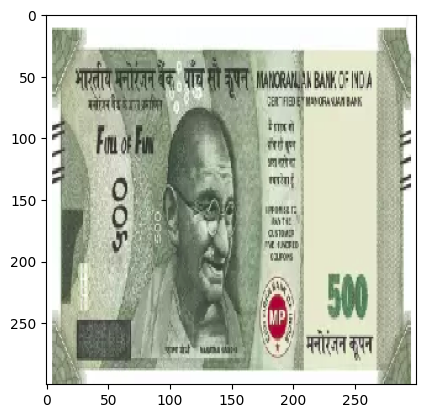

In [23]:
#testing the model
img=image.load_img("/content/Screenshot from 2023-04-30 14-53-02.png",target_size=(300,300)) #The path of the testing image,the pic taken from the phone should come here
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img) #predicting the image using model created
if(output[0][0]>output[0][1]): #comparison
    print("Real")
else:
    print("Fake")

1/1 [==============================] - 1s 639ms/step
Real


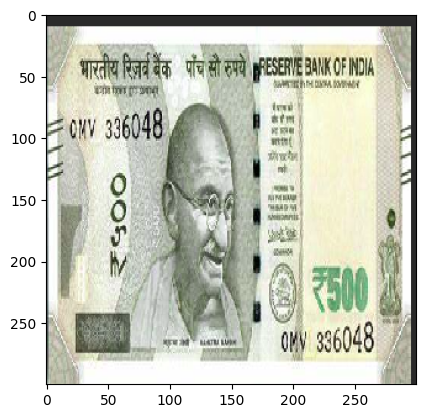

In [22]:
#testing the model
img=image.load_img("/content/Screenshot from 2023-04-30 14-49-49.png",target_size=(300,300)) #The path of the testing image,the pic taken from the phone should come here
img=np.asarray(img)
plt.imshow(img)
img=np.expand_dims(img,axis=0)
finetune_model.load_weights("Final_model.h5")

output=finetune_model.predict(img) #predicting the image using model created
if(output[0][0]>output[0][1]): #comparison
    print("Fake")
else:
    print("Real")